# **Algae Image Classification Model with TensorFlow**
## Aim
The aim of this notebook is to build and train a convolutional neural network (CNN) for algae image classification using TensorFlow.

## Importing Libraries
Below, we import the necessary libraries for building and training our model, including Numpy, TensorFlow, Keras, and os.

In [2]:
# Importing required libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


## **Counting and Displaying Image Data**
### Description
In this section, we count the total number of images in the dataset and display the number of images in each subfolder. This helps us understand the distribution of images across different categories.

### Code Explanation
- **Input**: The `Images/` directory contains subfolders, each representing a category of images.
- **Process**:
  1. Loop through each subfolder in `Images/`.
  2. Count the number of files (images) in each subfolder.
  3. Display the folder name and the count of images in that folder.
  4. Sum up the total number of images across all subfolders.
- **Output**: Prints the number of images per folder and the total image count.

In [5]:
# Counting and displaying the number of images in each folder
count = 0 
dirs = os.listdir('Images/')                                  # List all subdirectories in the 'Images/' folder
for dir in dirs:
    files = list(os.listdir('Images/'+dir))                   # List all files in each subdirectory
    print( dir +' Folder has '+ str(len(files)) + ' Images')  # Print folder name and image count
    count = count + len(files)                                # Increment total image count
print( 'Images Folder has '+ str(count) + ' Images')          # Print total image count

.ipynb_checkpoints Folder has 0 Images
Amphora Folder has 109 Images
Anabaena Folder has 344 Images
Anabaenopsis Folder has 83 Images
Aphanocapsa Folder has 90 Images
Chaestoceros Folder has 199 Images
Chlamydomonas Folder has 888 Images
Chlorella Folder has 297 Images
Chodatella Folder has 95 Images
Chroococcus Folder has 182 Images
Coscinodiscus Folder has 68 Images
Cryptomonas Folder has 314 Images
Cyclotella Folder has 128 Images
Dictyosphaerium Folder has 360 Images
Diploneis Folder has 165 Images
Euglena Folder has 1194 Images
Glenodinium Folder has 88 Images
Gomphosphaeria Folder has 94 Images
Gymnodinium Folder has 246 Images
Gyrodinium Folder has 24 Images
Gyrosigma Folder has 96 Images
Melosira Folder has 220 Images
Microcystis Folder has 300 Images
Navicula Folder has 341 Images
Nitzschia Folder has 221 Images
Oocystis Folder has 176 Images
Pediastrum Folder has 249 Images
Peridinium Folder has 218 Images
Phacus Folder has 412 Images
Pinnularia Folder has 60 Images
Prorocent

## **Defining Key Parameters**
### Description
This section defines key parameters for processing the dataset and training the model.

### Code Explanation
- `base_dir`: The directory where the dataset (images) is stored.
- `img_size`: The target size (height and width in pixels) for resizing images. This ensures all input images are uniform.
- `batch`: The batch size, determining how many images are processed at once during training or validation.

These parameters will be used throughout the notebook for data preprocessing and model training.

In [8]:
# Defining key parameters
base_dir = 'Images/'         # Path to the directory containing the dataset
img_size = 180               # Target size for resizing images
batch = 32                   # Batch size for data processing

## **Loading and Splitting the Dataset**
### Description
In this section, we load the dataset from the specified directory and split it into training and validation sets. 

### Code Explanation
- **`tf.keras.utils.image_dataset_from_directory`**:
  - Loads images from a directory and automatically labels them based on subfolder names.
  - Splits the dataset into training and validation sets using the `validation_split` and `subset` parameters.
  - Ensures reproducibility by setting a random seed (`seed=123`).
- **Parameters**:
  - `base_dir`: The directory containing the dataset.
  - `validation_split`: Fraction of the dataset to use for validation (20% in this case).
  - `subset`: Specifies whether to create a training or validation dataset.
  - `batch_size`: The number of images processed together in one batch.
  - `image_size`: Resizes all images to a uniform size (`img_size` x `img_size`).
- **Output**:
  - `train_ds`: A dataset object containing the training images and their labels.
  - `val_ds`: A dataset object containing the validation images and their labels.

In [11]:
# Loading and splitting the dataset into training and validation sets
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,                       # Seed for reproducibility
                                                       validation_split=0.2,             # 20% of the dataset used for validation
                                                       subset = 'training',              # Training subset
                                                       batch_size=batch,                 # Batch size
                                                       image_size=(img_size,img_size))   # Resizing images to uniform dimensions

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,                          
                                                       seed = 123,                       # Seed for reproducibility
                                                       validation_split=0.2,             # 20% of the dataset used for validation
                                                       subset = 'validation',            # Validation subset
                                                       batch_size=batch,                 # Batch size
                                                       image_size=(img_size,img_size))   # Resizing images to uniform dimensions

Found 8577 files belonging to 34 classes.
Using 6862 files for training.
Found 8577 files belonging to 34 classes.
Using 1715 files for validation.


## **Extracting Class Names**
### Description
This section retrieves and displays the class names (categories) in the dataset. These class names correspond to the subfolder names within the dataset directory.

### Code Explanation
- `train_ds.class_names`: Automatically extracts class names from the dataset created earlier. Each subfolder in the dataset directory represents a class.
- `algae_names`: Stores the extracted class names for reference.
- **Output**: Prints the list of class names (e.g., categories like 'Amphora', 'Anabaena').

### Importance
Understanding the class names helps us confirm the dataset's organization and verify the categories of the classification task.

In [14]:
# Extracting and displaying class names from the training dataset
algae_names = train_ds.class_names                                 # List of class names (derived from subfolder names)
algae_names                                                        # Display class names

['Amphora',
 'Anabaena',
 'Anabaenopsis',
 'Aphanocapsa',
 'Chaestoceros',
 'Chlamydomonas',
 'Chlorella',
 'Chodatella',
 'Chroococcus',
 'Coscinodiscus',
 'Cryptomonas',
 'Cyclotella',
 'Dictyosphaerium',
 'Diploneis',
 'Euglena',
 'Glenodinium',
 'Gomphosphaeria',
 'Gymnodinium',
 'Gyrodinium',
 'Gyrosigma',
 'Melosira',
 'Microcystis',
 'Navicula',
 'Nitzschia',
 'Oocystis',
 'Pediastrum',
 'Peridinium',
 'Phacus',
 'Pinnularia',
 'Prorocentrum',
 'Scenedesmus',
 'Spirulina',
 'Tetraselmis',
 'Treubaria']

## **Importing Matplotlib for Visualization**
### Description
In this section, we import the `matplotlib.pyplot` library to visualize the data and model performance. 

### Code Explanation
- `matplotlib.pyplot`: A Python library for creating static, animated, and interactive visualizations, such as plotting images, data trends, and metrics.
- This library will be used later in the notebook for visualizing sample images, training progress, and results.

### Why It's Needed
Visualization is crucial for understanding data distributions and evaluating model performance.

In [17]:
# Importing Matplotlib for data visualization
import matplotlib.pyplot as plt

## **Visualizing Sample Images from the Training Dataset**
### Description
In this section, we visualize a grid of sample images from the training dataset along with their corresponding class names.

### Code Explanation
- **Key Steps**:
  1. Use `train_ds.take(1)` to retrieve a single batch of images and labels from the training dataset.
  2. Loop through the first 9 images in the batch to display them in a 3x3 grid.
  3. For each image:
     - Convert it to a NumPy array using `.numpy()` and ensure it is properly formatted for visualization (`astype('uint8')`).
     - Use `plt.imshow()` to display the image.
     - Set the title to the corresponding class name using `algae_names[labels[i]]`.
     - Remove axis labels using `plt.axis('off')`.
- **Output**: A 3x3 grid of sample images from the training dataset with their class names as titles.

### Why It's Important
Visualizing sample images helps verify that the dataset is loaded and labeled correctly, ensuring the training data is prepared as expected.

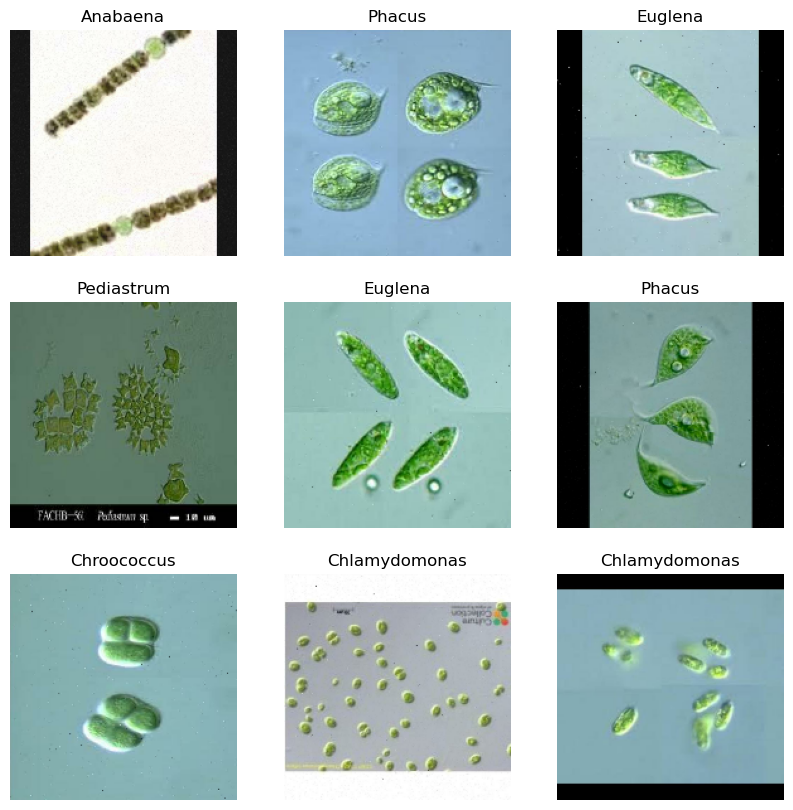

In [20]:
# Visualizing a grid of sample images from the training dataset
i = 0                                                                 # Initialize a counter
plt.figure(figsize=(10,10))                                           # Set the figure size for the grid

for images, labels in train_ds.take(1):                               # Take one batch of data from the training dataset
    for i in range(9):                                                # Loop through the first 9 images in the batch
        plt.subplot(3,3, i+1)                                         # Create a subplot for each image in a 3x3 grid
        plt.imshow(images[i].numpy().astype('uint8'))                 # Display the image
        plt.title(algae_names[labels[i]])                             # Set the title to the class name
        plt.axis('off')                                               # Remove axis labels

## **Setting Auto-Tuning for Performance Optimization**
### Description
This line of code configures automatic performance optimization for data loading in TensorFlow.

### Code Explanation
- **`AUTOTUNE`**: A special constant in TensorFlow that allows for automatic tuning of performance when loading and preprocessing data.
- **`tf.data.AUTOTUNE`**: Automatically adjusts the number of parallel calls for data loading to optimize performance based on the system’s capabilities.

### Why It's Important
Using `AUTOTUNE` helps speed up data loading by adjusting the number of parallel calls dynamically, improving overall model training performance.

In [25]:
# Enabling automatic performance tuning for data loading
AUTOTUNE = tf.data.AUTOTUNE                              # Automatically adjusts parallelism for optimal performance

## **Optimizing Data Pipeline for Training**
### Description
This section optimizes the data pipeline by caching, shuffling, and prefetching the dataset to improve training performance.

### Code Explanation
- **`train_ds.cache()`**: Caches the dataset in memory after the first epoch, so it doesn't need to be reloaded in subsequent epochs. This speeds up training by avoiding repeated disk reads.
- **`train_ds.shuffle(1000)`**: Shuffles the dataset with a buffer size of 1000. This randomizes the order of the images to reduce bias and help the model generalize better.
- **`train_ds.prefetch(buffer_size=AUTOTUNE)`**: Prefetches data asynchronously while the model is training, allowing the next batch to be prepared while the current one is being processed. The `AUTOTUNE` setting allows TensorFlow to adjust the number of elements to prefetch dynamically for optimal performance.

### Why It's Important
These optimizations help in speeding up the training process by making efficient use of memory and CPU/GPU resources.

In [28]:
# Optimizing the training dataset pipeline for better performance
train_ds = train_ds.cache()                         # Cache the dataset in memory
train_ds = train_ds.shuffle(1000)                   # Shuffle the dataset with a buffer size of 1000
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)  # Prefetch data for improved pipeline performance

## **Optimizing Data Pipeline for Validation**
### Description
This section optimizes the data pipeline for the validation dataset by caching and prefetching the data, similar to what was done with the training dataset.

### Code Explanation
- **`val_ds.cache()`**: Caches the validation dataset in memory after the first epoch, so it doesn’t need to be reloaded in subsequent epochs. This speeds up validation during training.
- **`val_ds.prefetch(buffer_size=AUTOTUNE)`**: Prefetches data asynchronously for the validation dataset, allowing the next batch to be prepared while the model is processing the current one. Using `AUTOTUNE` helps TensorFlow automatically determine the optimal number of elements to prefetch.

### Why It's Important
Optimizing the validation data pipeline ensures that the validation process is efficient and does not become a bottleneck during training, which is especially important for large datasets.

In [32]:
# Optimizing the validation dataset pipeline for better performance
val_ds = val_ds.cache()                         # Cache the validation dataset in memory
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)  # Prefetch data for efficient validation

## **Data Augmentation for Improved Generalization**
### Description
This section defines a data augmentation pipeline using TensorFlow's `Sequential` model. Data augmentation introduces random transformations to the training images, which helps improve the model's generalization ability by artificially expanding the dataset.

### Code Explanation
- **`Sequential([ ... ])`**: A Keras `Sequential` model used to stack layers of data augmentation operations.
- **Data Augmentation Layers**:
  - **`RandomFlip("horizontal", input_shape=(img_size, img_size, 3))`**: Randomly flips images horizontally with a probability of 50%. This helps the model generalize better by learning to recognize objects regardless of their orientation.
  - **`RandomRotation(0.1)`**: Rotates images randomly by up to 10% of the image's total rotation range (i.e., 36 degrees). This helps the model learn invariant features.
  - **`RandomZoom(0.1)`**: Zooms into the image randomly by up to 10%, adding variability to the dataset and helping the model become more robust to different scales.

### Why It's Important
Data augmentation artificially expands the training dataset by applying random transformations to the images. This reduces overfitting and helps the model generalize better on unseen data.

In [37]:
# Defining data augmentation pipeline
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),   # Random horizontal flip
    layers.RandomRotation(0.1),                                             # Random rotation up to 10%
    layers.RandomZoom(0.1)                                                  # Random zoom up to 10%
])

## **Visualizing Augmented Images**
### Description
This section visualizes a batch of images after applying the data augmentation pipeline. The goal is to observe how the images are transformed during augmentation.

### Code Explanation
- **Data Augmentation**: The `data_augmentation` layer is applied to each image in the batch. This includes random horizontal flips, rotations, and zooms, based on the parameters defined earlier.
- **Visualization**: 
  1. The code iterates through a single batch of images (`train_ds.take(1)`).
  2. For each image, the augmentation pipeline is applied.
  3. A 3x3 grid of images is displayed, showing 9 augmented images.
  4. The images are displayed with `plt.imshow()`, and the axis is removed (`plt.axis('off')`) for better clarity.
  
- **Output**: A grid of 9 augmented images, demonstrating different variations created by the data augmentation pipeline.

### Why It's Important
Visualizing augmented images helps verify that the augmentation pipeline is working correctly and shows how it can introduce variability into the dataset to improve model generalization.

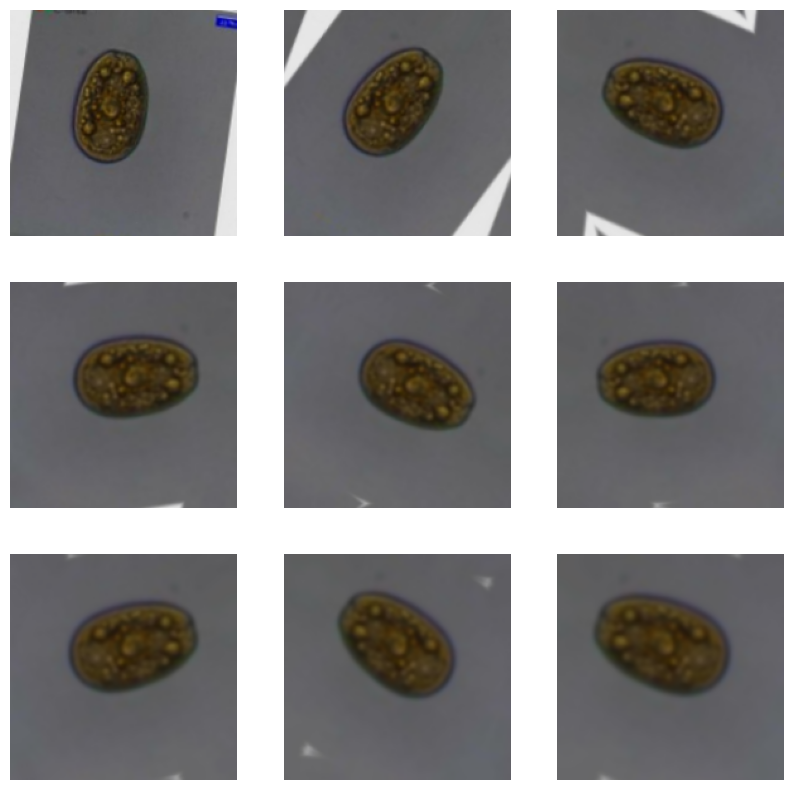

In [40]:
# Visualizing augmented images from the training dataset
i = 0                                                  # Initialize a counter
plt.figure(figsize=(10, 10))                           # Set the figure size for the grid

for images, labels in train_ds.take(1):                # Take one batch of data from the training dataset
    for i in range(9):                                 # Loop through the first 9 images in the batch
        images = data_augmentation(images)             # Apply data augmentation to each image
        plt.subplot(3, 3, i + 1)                       # Create a subplot for each image in a 3x3 grid
        plt.imshow(images[0].numpy().astype('uint8'))  # Display the augmented image
        plt.axis('off')                                # Remove axis labels

## **Building the Convolutional Neural Network (CNN) Model**
### Description
This section defines the architecture of the CNN using Keras' `Sequential` model. The model consists of convolutional layers, pooling layers, dropout for regularization, and fully connected layers for classification.

### Code Explanation
- **`Sequential([ ... ])`**: The Keras `Sequential` model, where layers are stacked in a linear fashion.
  
#### Layers in the Model:
1. **`data_augmentation`**: The data augmentation layer is applied first, allowing the model to learn from augmented variations of the training data.
2. **`layers.Rescaling(1./255)`**: Rescales the image pixel values from the range [0, 255] to [0, 1]. This helps improve model training by normalizing the data.
3. **Convolutional Layers**:
   - **`Conv2D(16, 3, padding='same', activation='relu')`**: A convolutional layer with 16 filters, kernel size of 3, and 'same' padding. ReLU activation is used to introduce non-linearity.
   - **`MaxPooling2D()`**: A max-pooling layer that downsamples the feature maps, reducing spatial dimensions while keeping the most important features.
   - **`Conv2D(32, 3, padding='same', activation='relu')`**: Another convolutional layer, this time with 32 filters.
   - **`Conv2D(64, 3, padding='same', activation='relu')`**: A third convolutional layer with 64 filters.
4. **Dropout Layer**:
   - **`Dropout(0.2)`**: A dropout layer with a 20% dropout rate to help prevent overfitting by randomly disabling 20% of the neurons during training.
5. **Flatten Layer**:
   - **`Flatten()`**: Flattens the output of the last convolutional layer into a 1D vector for input into the fully connected layers.
6. **Fully Connected Layers**:
   - **`Dense(128, activation='relu')`**: A fully connected layer with 128 units and ReLU activation.
   - **`Dense(34)`**: The final output layer with 34 units, corresponding to the 34 classes in the dataset. No activation is applied here, as this is a multi-class classification problem with softmax used in the loss function.

### Why It's Important
This CNN model is designed for image classification. The combination of convolutional layers, pooling, dropout, and fully connected layers allows the model to learn spatial features from the images and classify them into one of the 34 classes.

In [43]:
# Defining the CNN model
model = Sequential([
    data_augmentation,                                 # Data augmentation to generate new training samples
    layers.Rescaling(1./255),                          # Rescale pixel values to [0, 1]
    Conv2D(16, 3, padding='same', activation='relu'),  # First convolutional layer
    MaxPooling2D(),                                    # Max-pooling layer
    Conv2D(32, 3, padding='same', activation='relu'),  # Second convolutional layer
    MaxPooling2D(),                                    # Max-pooling layer
    Conv2D(64, 3, padding='same', activation='relu'),  # Third convolutional layer
    MaxPooling2D(),                                    # Max-pooling layer
    Dropout(0.2),                                      # Dropout layer with 20% dropout rate
    Flatten(),                                         # Flatten the output for the fully connected layers
    Dense(128, activation='relu'),                     # Fully connected layer with 128 units
    Dense(34)                                          # Output layer with 34 units, one for each class
])

## **Compiling the Model**
### Description
In this section, we compile the model, specifying the optimizer, loss function, and evaluation metrics to be used during training.

### Code Explanation
- **`optimizer='adam'`**: We use the Adam optimizer, which is an adaptive learning rate optimization algorithm. It combines the benefits of both SGD with momentum and RMSProp, making it effective for training deep learning models.
- **`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`**: The loss function is set to sparse categorical cross-entropy, which is suitable for multi-class classification problems where labels are integers (not one-hot encoded). The `from_logits=True` argument indicates that the model's output layer is not passed through a softmax activation and the raw logits are being used.
- **`metrics=['accuracy']`**: We track accuracy as the evaluation metric during training. Accuracy measures the percentage of correctly classified samples.

### Why It's Important
Compiling the model specifies the optimization strategy and how the model’s performance will be evaluated. The chosen loss function and optimizer are well-suited for a multi-class classification task.

In [46]:
# Compiling the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the metric
model.compile(optimizer='adam',                                                      # Adam optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Sparse categorical cross-entropy loss
              metrics=['accuracy'])                                                  # Track accuracy during training

## **Displaying Model Summary**
### Description
This section displays the architecture summary of the compiled model, providing a detailed overview of the layers, their output shapes, and the number of parameters in the model.

### Code Explanation
- **`model.summary()`**: This function call outputs a summary of the model architecture. It includes details such as:
  - The names and types of each layer.
  - The output shape of each layer.
  - The number of trainable and non-trainable parameters in the model.

### Why It's Important
The model summary allows us to quickly verify the architecture, ensuring that all layers are configured as intended. It also provides an overview of the model's complexity by showing the total number of parameters.

In [49]:
# Displaying the model summary to review the architecture
model.summary()            # Outputs a detailed summary of the model's layers and parameters

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 34)                  │           4,386 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,993,026 (15.23 MB)

 Trainable params: 3,993,026 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

## **Training the Model**
### Description
This section trains the model using the training dataset (`train_ds`) and validates it using the validation dataset (`val_ds`) over a specified number of epochs.

### Code Explanation
- **`history = model.fit(train_ds, epochs=50, validation_data=val_ds)`**:
  - **`train_ds`**: The training dataset, which is used to train the model.
  - **`epochs=50`**: The model will be trained for 50 epochs. During each epoch, the model will process the entire training dataset once.
  - **`validation_data=val_ds`**: The model's performance will be evaluated on the validation dataset at the end of each epoch.
  - **`history`**: The `fit` method returns a `History` object, which contains information about the training and validation loss, as well as accuracy, for each epoch. This can be used for further analysis or visualization of training progress.

### Why It's Important
Training the model with the specified parameters allows it to learn from the training data and generalize to new, unseen data. Tracking performance on the validation set helps identify overfitting or underfitting.

In [52]:
# Training the model for 50 epochs with validation data
history = model.fit(train_ds, epochs=50, validation_data=val_ds)  # Train the model with validation at each epoch

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - accuracy: 0.1629 - loss: 3.1597 - val_accuracy: 0.2128 - val_loss: 2.8455
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - accuracy: 0.2235 - loss: 2.7660 - val_accuracy: 0.2624 - val_loss: 2.5155
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 182ms/step - accuracy: 0.2574 - loss: 2.5019 - val_accuracy: 0.3184 - val_loss: 2.3053
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 184ms/step - accuracy: 0.3098 - loss: 2.2988 - val_accuracy: 0.3592 - val_loss: 2.1059
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 181ms/step - accuracy: 0.3653 - loss: 2.0536 - val_accuracy: 0.4012 - val_loss: 1.9915
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 40s 188ms/step - accuracy: 0.4175 - loss: 1.8995 - val_accuracy: 0.4437 - val_loss: 1.7992
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 183ms/step - accuracy: 0.4601 - loss: 1.7436 - val_accuracy: 0.4653 - val_loss: 1.7356
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 39s 181ms/step - accuracy: 0.5016 - loss: 1

## **Image Classification Function**
### Description
This function takes the path of an image as input, processes it, and then classifies it using the trained model. The function returns the predicted class and the associated confidence score.

### Code Explanation
- **`input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))`**: Loads the input image from the specified path and resizes it to the target size of 180x180 pixels (matching the input size of the model).
- **`input_image_array = tf.keras.utils.img_to_array(input_image)`**: Converts the loaded image into a NumPy array, which is the format expected by the model.
- **`input_image_exp_dim = tf.expand_dims(input_image_array, 0)`**: Adds an extra dimension to the array (batch dimension) to make it compatible with the model’s input, which expects a batch of images.
- **`predictions = model.predict(input_image_exp_dim)`**: Passes the processed image to the trained model to make a prediction. The model returns logits (raw prediction scores).
- **`result = tf.nn.softmax(predictions[0])`**: Applies the softmax activation function to the model's predictions, converting the logits into probabilities. This gives the probability of the image belonging to each class.
- **`outcome = 'The Image belongs to ' + algae_names[np.argmax(result)] + ' with a score of ' + str(np.max(result) * 100)`**: Finds the class with the highest probability (`np.argmax(result)`) and formats the outcome as a string, displaying the predicted class name and the confidence score (multiplied by 100 to get the percentage).
  
### Why It's Important
This function is essential for making predictions on new images using the trained model. It provides the predicted class and the model's confidence in the prediction, which can be useful for understanding the model's certainty in its classification.

In [55]:
# Define a function to classify images based on the trained model
def classify_images(image_path):
    # Load and preprocess the image
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))   # Load and resize the image
    input_image_array = tf.keras.utils.img_to_array(input_image)               # Convert the image to a NumPy array
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)                 # Add batch dimension
    
    # Make a prediction with the model
    predictions = model.predict(input_image_exp_dim)     # Get model predictions
    result = tf.nn.softmax(predictions[0])               # Apply softmax to get probabilities
    outcome = 'The Image belongs to ' + algae_names[np.argmax(result)] + ' with a score of ' + str(np.max(result) * 100)  # Format the result
    
    return outcome     # Return the prediction outcome

## **Classifying an Image of Algae**
### Description
This section demonstrates how to use the `classify_images` function to classify a sample image of algae. The input image is passed to the function, and it returns the predicted class along with the model's confidence score.

### Code Explanation
- **`classify_images('Samples/anabaenasample.jpg')`**: The path to a sample image (`'Samples/anabaenasample.jpg'`) is provided as input to the `classify_images` function. The function processes the image and classifies it using the trained model.
  
- The output will include the predicted class of the algae and the confidence score in percentage.

### Why It's Important
This step demonstrates how to use the trained model to make predictions on new, unseen data. It helps verify if the model can correctly classify a sample image.


In [58]:
# Classify the image of algae
classify_images('Samples/anabaenasample.jpg')  # Classify the sample image and print the result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


'The Image belongs to Anabaena with a score of 99.29187893867493'

## **Saving the Trained Model**
### Description
This section saves the trained model to a file, allowing it to be reused for future predictions or deployed without the need to retrain it.

### Code Explanation
- **`model.save('Algae_Recog_Model.h5')`**: The `save()` method is used to save the trained model to a file named `'Algae_Recog_Model.h5'`. The file format `.h5` is the standard HDF5 format, which stores the model architecture, weights, and training configuration.
  
  - This allows the model to be reloaded later using `tf.keras.models.load_model()` for further use without retraining.

### Why It's Important
Saving the model is essential for preserving the trained model so it can be used for future inference or deployment. This ensures that you don’t have to retrain the model each time you need to make predictions.

In [63]:
# Save the trained model to a file
model.save('Algae_Recog_Model.h5')  # Save the model as an HDF5 file